In [1]:
# fill nan inclinations, Omega, argp with random selections
# need to do a disk integration since there isn't a single path that light takes
#    - need to account for angles spanning the visible portion of the illuminated hemisphere

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const
from matplotlib.ticker import MaxNLocator

In [3]:
systems = eppe.Systems(load=True)
mission = eppe.EPPE()
fp, fstar, noise = mission.expose_photometric(systems, 1)

/home/taylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


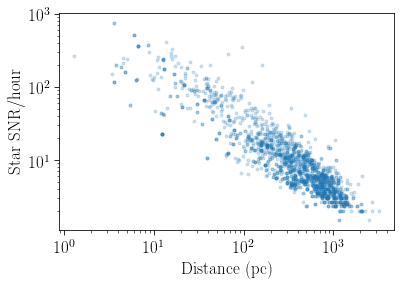

In [4]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fstar/noise, '.', alpha=0.2)
plt.ylabel(r'$\rm Star~SNR/hour$')
plt.xlabel(r'$\rm Distance~(pc)$')
plt.show()

/home/taylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


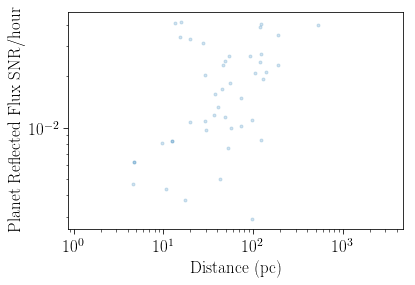

In [5]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fp/noise, '.', alpha=0.2)
plt.ylabel(r'$\rm Planet~Reflected~Flux~SNR/hour$')
plt.xlabel(r'$\rm Distance~(pc)$')
plt.show()

In [45]:
mission = eppe.EPPE()
stokesCurves = mission.observe_polarization(systems, 2, 10*3*24., photonNoise=True)
fps, fstars, times, phases = mission.observe_photometric(systems, 2, 10*3*24., photonNoise=True)

/home/taylor/Documents/Research/EPPE/EPPE_Simulator/EPPE_Simulator/EPPE.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  nPhotons_stokes = np.random.normal(loc=0, scale=0.5/np.sqrt(fplanetObs[i]/3.),
/home/taylor/Documents/Research/EPPE/EPPE_Simulator/EPPE_Simulator/EPPE.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  nPhotonsStar_stokes = np.random.normal(loc=0, scale=0.5/np.sqrt(fstarObs[i]/3.),


In [52]:
# i = 1
# i = np.where(systems.catalogue['name']=='WASP-12 b')[0][0]
# i = np.where(systems.catalogue['name']=='HD 189733 b')[0][0]
# i = np.where(systems.catalogue['name']=='HD 209458 b')[0][0]
# i = np.where(systems.catalogue['name']=='KELT-7 b')[0][0]
i = np.where(systems.catalogue['name']=='KELT-9 b')[0][0]

In [53]:
print('Name:', systems.catalogue['name'][i])
print('Transit Depth: '+str(np.round((systems.catalogue['rp'][i]/systems.catalogue['rstar'][i])**2*100, 3))+'%')
print('Equilibrium Temperature: '+str(int(np.rint((systems.catalogue['teff'][i]*np.sqrt(systems.catalogue['rstar'][i]/systems.catalogue['a'][i])))))+' K')
print('Distance: '+str(int(np.rint(systems.catalogue['dist'][i]/const.pc.value)))+' pc')
print('Radius: '+str(np.round(systems.catalogue['rp'][i]/const.R_jup.value, 2))+' Rjup')

Name: KELT-9 b
Transit Depth: 0.678%
Equilibrium Temperature: 5726 K
Distance: 189 pc
Radius: 1.89 Rjup


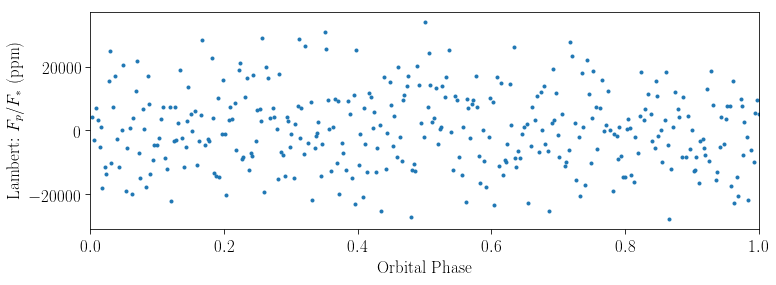

In [54]:
fig = plt.figure(figsize=(12,4))
ax = plt.gca()
ax.plot(phases[i], ((fps[i]+fstars[i])/np.median(fstars[i])-1)*1e6, '.')
ax.set_ylabel(r'$\rm Lambert$:$~F_p/F_*~({\rm ppm})$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
plt.show()
plt.close(fig)

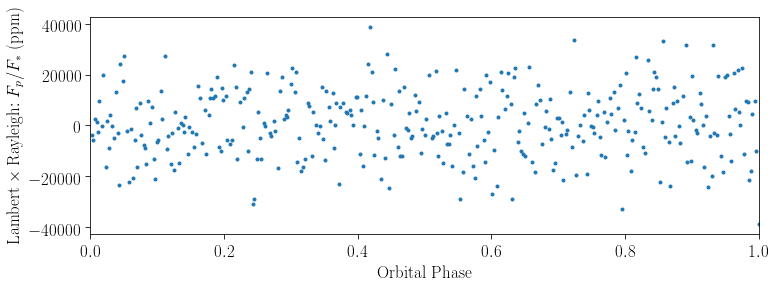

In [55]:
fig = plt.figure(figsize=(12,4))
ax = plt.gca()
ax.plot(stokesCurves[i][-1], (stokesCurves[i][0]/np.median(fstars[i])-1)*1e6, '.')
ax.set_ylabel(r'$\rm Lambert \times Rayleigh$:$~F_p/F_*~({\rm ppm})$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
plt.show()
plt.close(fig)

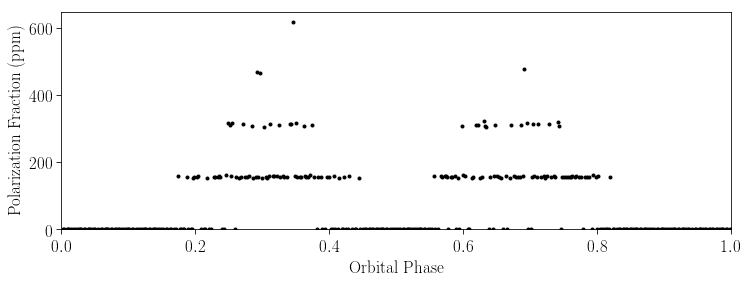

In [56]:
fig = plt.figure(figsize=(12,4))
ax = plt.gca()
ax.plot(stokesCurves[i][-1], np.sqrt(stokesCurves[i][1]**2+stokesCurves[i][2]**2)/stokesCurves[i][0]*1e6, '.', c='k')
ax.set_ylabel(r'$\rm Polarization~Fraction~(ppm)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
ax.set_ylim(0)
plt.show()
plt.close(fig)

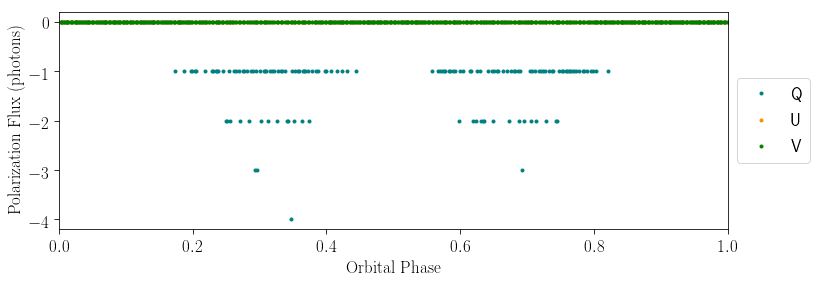

In [57]:
fig = plt.figure(figsize=(12,4))
ax = plt.gca()
ax.plot(stokesCurves[i][-1], stokesCurves[i][1], '.', c='teal', label='Q')
ax.plot(stokesCurves[i][-1], stokesCurves[i][2], '.', c='darkorange', label='U')
ax.plot(stokesCurves[i][-1], stokesCurves[i][3], '.', c='green', label='V')
ax.set_ylabel(r'$\rm Polarization~Flux~(photons)$')
ax.set_xlabel(r'$\rm Orbital~Phase$')
ax.set_xlim(0,1)
ax.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.show()
plt.close(fig)